# ML project of Laptop Price Prediction

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df=pd.read_csv("/content/laptop.csv")
df

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


### Data exploration and analysis

In [3]:
# summary of the data --> mathematical calculation
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [4]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# it gives the columns names
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [6]:
# it gives the shape of data. ----> rows * columns
df.shape

(1303, 13)

### Data cleaning

In [7]:
# check the null values of each columns
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [8]:
# check duplicate sum of rows
df.duplicated().sum()

0

In [9]:
# removes the unwanted columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'],inplace = True)

In [10]:
# returns the unique values of each column
df.nunique()

Company              19
TypeName              6
Inches               25
ScreenResolution     40
Cpu                 118
Ram                  10
Memory               40
Gpu                 110
OpSys                 9
Weight              189
Price               777
dtype: int64

In [11]:
# handle missing values
from sklearn.impute import SimpleImputer
columns_df = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight','Price']
ss = SimpleImputer(strategy="most_frequent")
df[columns_df] = ss.fit_transform(df[columns_df])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1303 non-null   object
 1   TypeName          1303 non-null   object
 2   Inches            1303 non-null   object
 3   ScreenResolution  1303 non-null   object
 4   Cpu               1303 non-null   object
 5   Ram               1303 non-null   object
 6   Memory            1303 non-null   object
 7   Gpu               1303 non-null   object
 8   OpSys             1303 non-null   object
 9   Weight            1303 non-null   object
 10  Price             1303 non-null   object
dtypes: object(11)
memory usage: 112.1+ KB


In [13]:
# checks the '?', 'NaN', 'None' values from each columns
df[df['Inches'].isin(['?', 'NaN', 'None']) | df['Weight'].isin(['?', 'NaN', 'None']) | df['Memory'].isin(['?', 'NaN', 'None'])]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


In [14]:
# replace string to empty space
df["Ram"]=df["Ram"].str.replace("GB","")

In [15]:
df["Weight"]=df["Weight"].str.replace("kg","")

In [16]:
# replace '?' to empty space
import re
df['Inches'] = df['Inches'].str.replace(r'\?', '', regex=True)

In [17]:
df['Weight'] = df['Weight'].str.replace(r'\?', '', regex=True)

In [18]:
df['Inches'].replace('', '1', inplace=True)

In [19]:
df['Weight'].replace('', '1', inplace=True)

In [20]:
df["Ram"]=df["Ram"].astype("int32")

In [21]:
df["Inches"]=df["Inches"].astype("float")

In [22]:
df["Weight"]=df["Weight"].astype("float")

In [23]:
df["Price"]=df["Price"].astype("float")

In [24]:
# again i was check the (['?', 'NaN', 'None']) values
df[df['Inches'].isin(['?', 'NaN', 'None']) | df['Weight'].isin(['?', 'NaN', 'None']) | df['Memory'].isin(['?', 'NaN', 'None'])]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,?,AMD Radeon R7 M445,Windows 10,2.3,62938.0656


<Axes: ylabel='Price'>

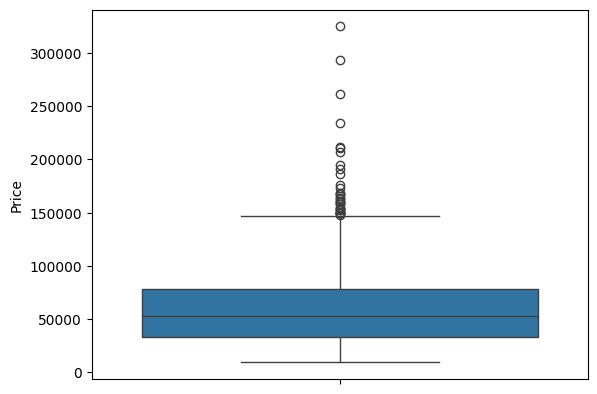

In [25]:
# check outliers
sns.boxplot(df['Price'])

In [26]:
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
df["Price"]=df["Price"].clip(ll,ul)

<Axes: ylabel='Price'>

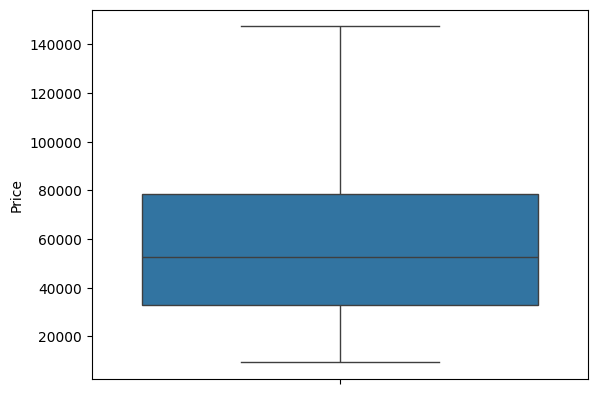

In [27]:
sns.boxplot(df['Price'])

### EDA(Exploratory Data Analysis) and Data preparation

<ipython-input-28-bd11fd8d838a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

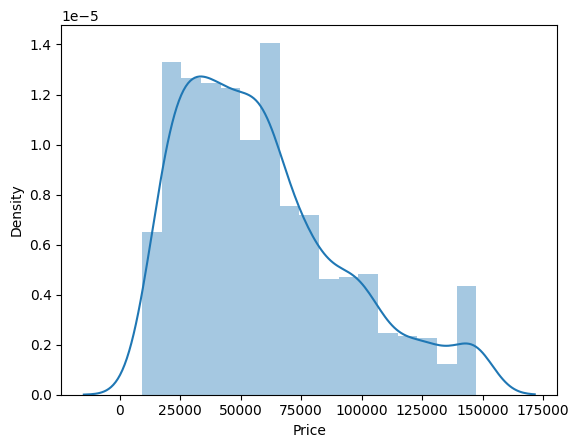

In [28]:
sns.distplot(df["Price"])

<Axes: xlabel='Company'>

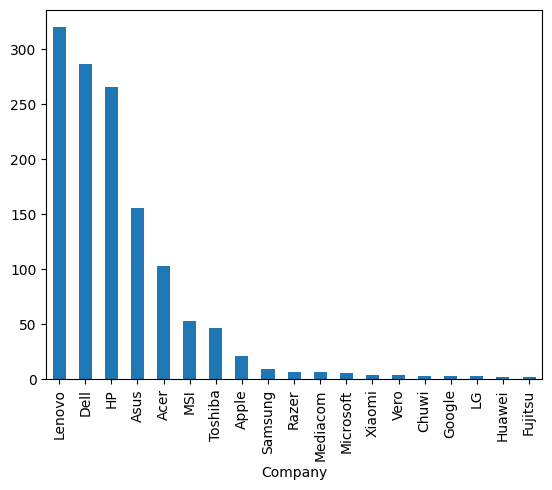

In [29]:
df["Company"].value_counts().plot(kind="bar")


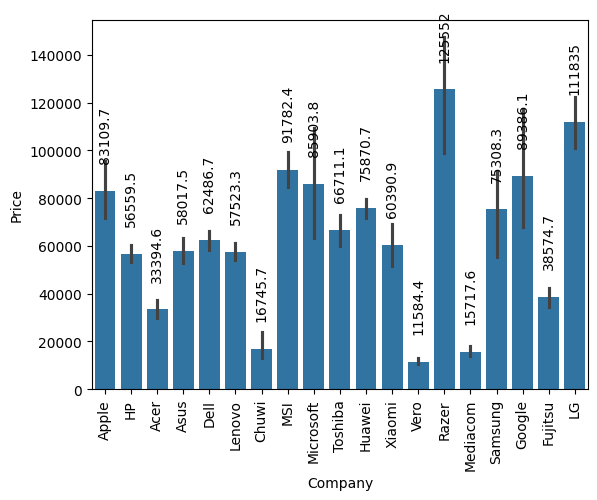

In [30]:
ax=sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
for i in ax.containers:
  ax.bar_label(i, rotation=90, padding=20)
plt.show()

<Axes: xlabel='TypeName'>

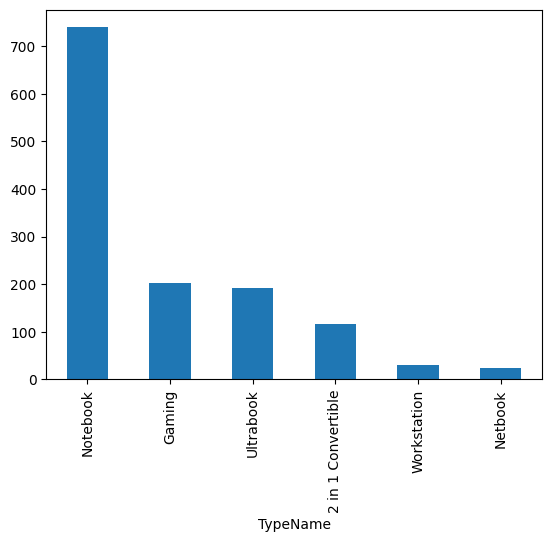

In [31]:
df["TypeName"].value_counts().plot(kind="bar")

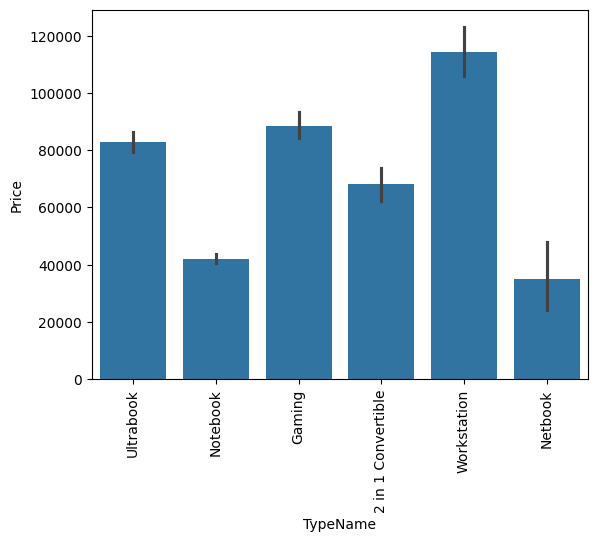

In [32]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<ipython-input-33-106b9e832952>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Inches"])


<Axes: ylabel='Density'>

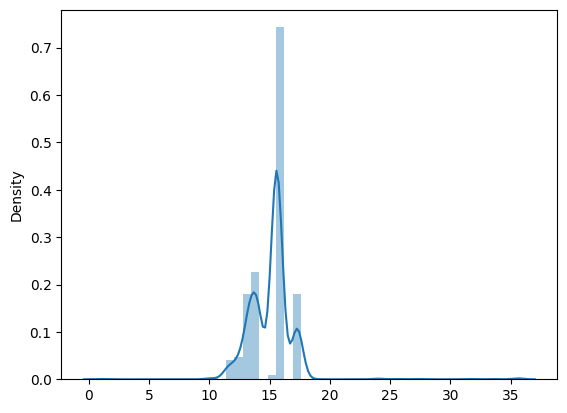

In [33]:
sns.distplot(x=df["Inches"])

<Axes: xlabel='Inches', ylabel='Price'>

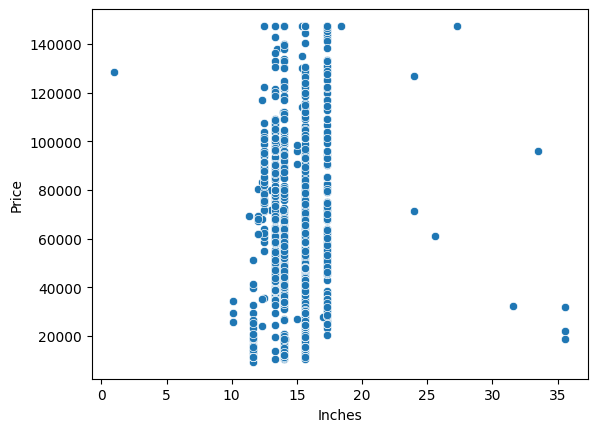

In [34]:
sns.scatterplot(x="Inches",y="Price",data=df)

In [35]:
# count the each data
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                525
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [36]:
# add new column and convert the 1 and 0
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [37]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0


<Axes: xlabel='Touchscreen'>

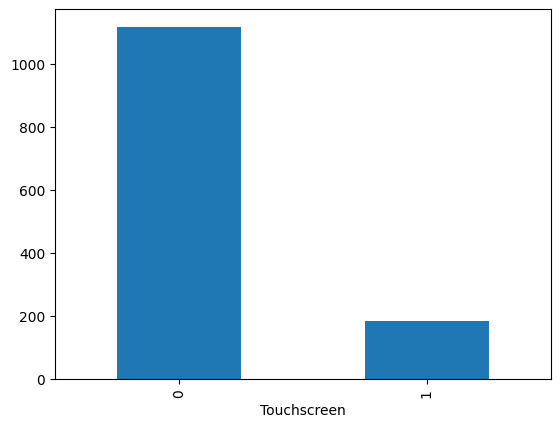

In [38]:
df["Touchscreen"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

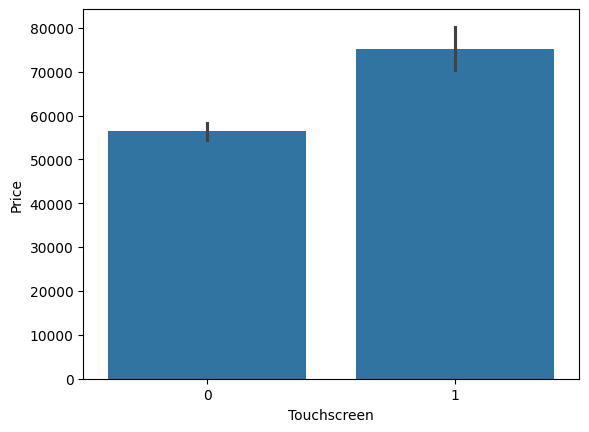

In [39]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [40]:
# add new column through 'ScreenResolution' column and convert 0, 1
df["Ips"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips', ylabel='Price'>

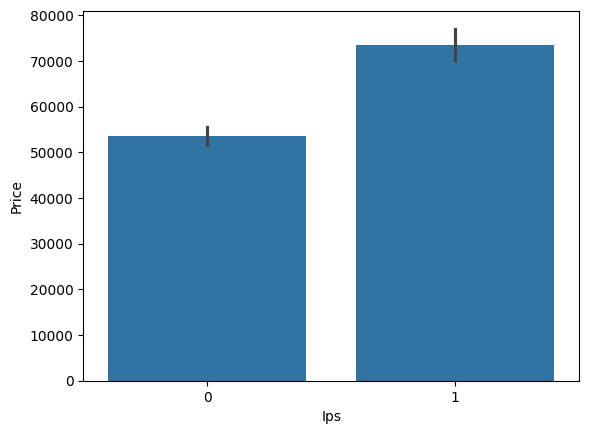

In [42]:
sns.barplot(x=df["Ips"],y=df["Price"])

In [43]:
# seperate from 'X'
df["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [44]:
# add the new columns of seperate from 'X' using ScreenResolution
df[['X_res', 'Y_res']]= df["ScreenResolution"].str.split("x",n=1,expand=True)

In [45]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [46]:
# removes the string and relace the empty sace
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [47]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [48]:
# convert 'int' format
df["X_res"] = df["X_res"].astype("int32")

In [49]:
df["Y_res"] = df["Y_res"].astype("int32")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [51]:
# calculate the correlation coefficients between all pairs of numerical columns
# use of corr() --> how variables relate to each other, aiding in analysis, feature selection, and predictive modeling
numerical_df=df.select_dtypes(include=['int', 'float']).columns
df[numerical_df].corr()

,Inches,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res
Inches,1.000000,0.139200,0.487972,0.014874,-0.233502,-0.097834,-0.051277,-0.062664
Ram,0.139200,1.000000,0.282800,0.660401,0.094929,0.215171,0.407307,0.398986
Weight,0.487972,0.282800,1.000000,0.149782,-0.251406,0.000672,-0.042020,-0.059725
Price,0.014874,0.660401,0.149782,1.000000,0.194502,0.264988,0.553976,0.551814
Touchscreen,-0.233502,0.094929,-0.251406,0.194502,1.000000,0.157634,0.342907,0.349669
Ips,-0.097834,0.215171,0.000672,0.264988,0.157634,1.000000,0.285892,0.293124
X_res,-0.051277,0.407307,-0.042020,0.553976,0.342907,0.285892,1.000000,0.994145
Y_res,-0.062664,0.398986,-0.059725,0.551814,0.349669,0.293124,0.994145,1.000000


In [52]:
# it is not a mandatory. claculate diagonal_resolution per each 'Inches'PPI(Pixel Per Inch.)
# df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [53]:
#numerical_df=df.select_dtypes(include=['int', 'float']).columns
#df[numerical_df].corr()

In [54]:
df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)

In [55]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [56]:
# calculate the 'cpu' column`s rows of data
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     213
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [57]:
# seperates the some 'x' length of string
df['Cpu_Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Cpu_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


In [58]:
# its defines seperates the data from 'cpu' columns using
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [60]:
# apply the function and create the new column
df['Cpu_brand'] = df['Cpu_Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Cpu_Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_brand'>

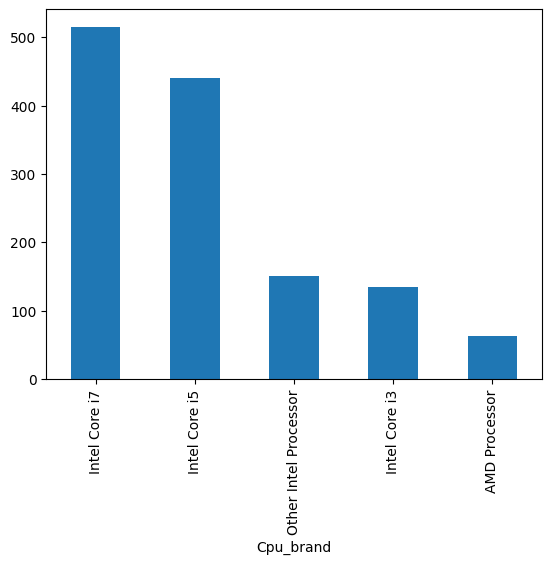

In [61]:
df['Cpu_brand'].value_counts().plot(kind='bar')

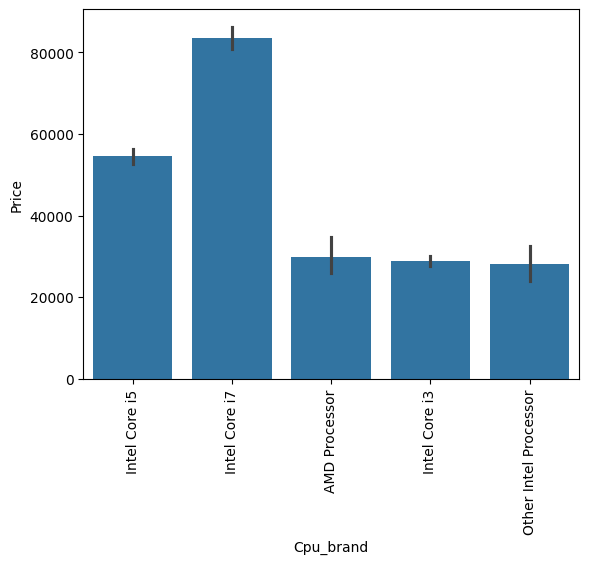

In [62]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df.drop(columns=['Cpu','Cpu_Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


<Axes: xlabel='Ram'>

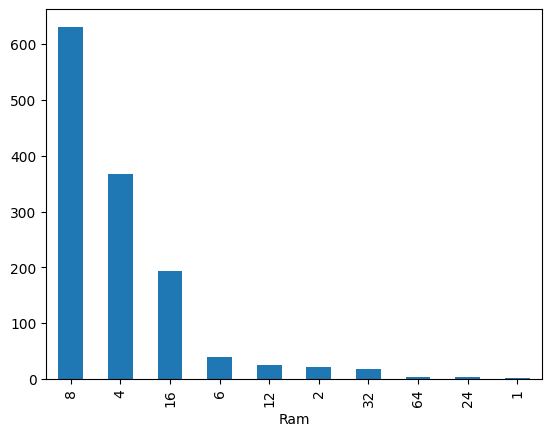

In [64]:
df['Ram'].value_counts().plot(kind='bar')

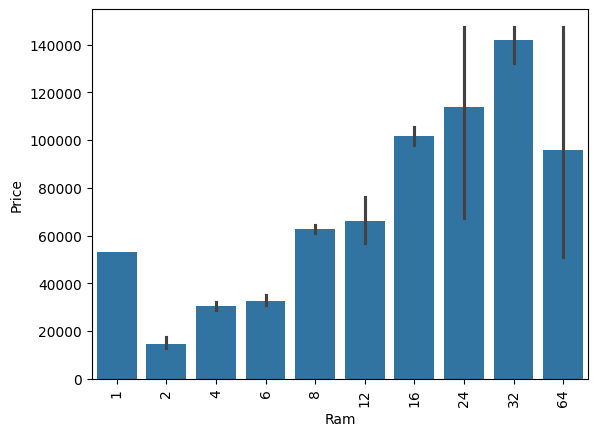

In [65]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df['OpSys']. value_counts()

OpSys
Windows 10      1077
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

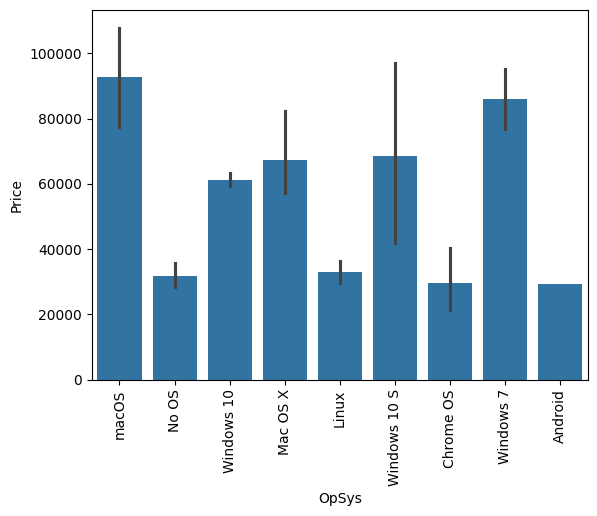

In [67]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
# create a function and similar data should be merged from 'OpSys' column
def category_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'macOS' or os == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [69]:
df['Os']=df['OpSys'].apply(category_os)

<Axes: xlabel='Os', ylabel='Price'>

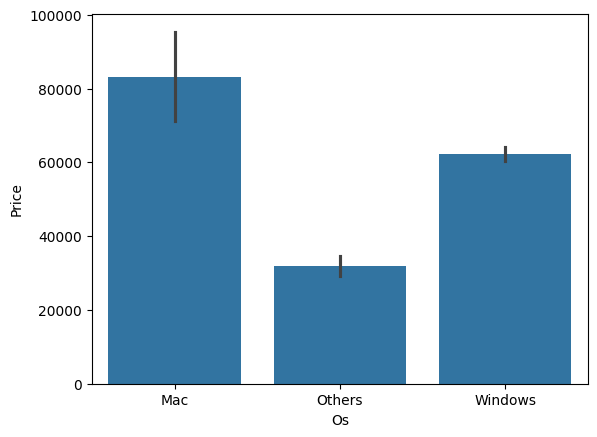

In [70]:
sns.barplot(x=df['Os'],y=df['Price'])

In [71]:
df.drop(columns=['OpSys'], inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,Touchscreen,Ips,Cpu_brand,Os
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,Intel Core i5,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,Intel Core i5,Mac
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,Intel Core i5,Others
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,Intel Core i7,Mac
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,Intel Core i5,Mac


In [72]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      301
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [73]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [74]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,Touchscreen,Ips,Cpu_brand,Os,Gpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,Intel Core i5,Mac,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,Intel Core i5,Mac,Intel
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,Intel Core i5,Others,Intel
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,Intel Core i7,Mac,AMD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,Intel Core i5,Mac,Intel


In [75]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     733
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

<Axes: xlabel='Gpu_brand', ylabel='Price'>

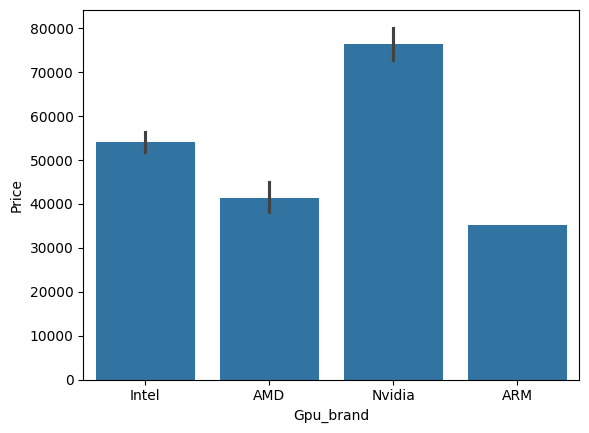

In [76]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])

In [77]:
df.drop(columns=['Gpu'], inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,Cpu_brand,Os,Gpu_brand
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,Intel Core i5,Mac,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,Intel Core i5,Mac,Intel
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,Intel Core i5,Others,Intel
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,Intel Core i7,Mac,AMD
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,Intel Core i5,Mac,Intel


In [78]:
df['Memory'].value_counts()

Memory
256GB SSD                        431
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [79]:
# replace the string to empty space
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
df['Memory'] = df['Memory'].str.replace(r'\?','0',regex=True)

In [80]:
# add new columns
new = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= new[0]
df["second"]= new[1]

In [81]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,Cpu_brand,Os,Gpu_brand,first,second
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,Intel Core i5,Mac,Intel,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,Intel Core i5,Mac,Intel,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,Intel Core i5,Others,Intel,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,Intel Core i7,Mac,AMD,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,Intel Core i5,Mac,Intel,256 SSD,None


In [82]:
# convert the string equals to 1 or 0
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.extract('(\d+)')

In [83]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,Cpu_brand,Os,Gpu_brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,Intel Core i5,Mac,Intel,128,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,Intel Core i5,Mac,Intel,128,None,0,0,0,1
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,Intel Core i5,Others,Intel,256,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,Intel Core i7,Mac,AMD,512,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,Intel Core i5,Mac,Intel,256,None,0,1,0,0


In [84]:
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.extract('(\d+)')

In [85]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,Cpu_brand,Os,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,Intel Core i5,Mac,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,Intel Core i5,Mac,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,1.86,30636.0000,0,0,Intel Core i5,Others,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,1.83,135195.3360,0,1,Intel Core i7,Mac,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,1.37,96095.8080,0,1,Intel Core i5,Mac,...,256,0,0,1,0,0,0,0,0,0


In [86]:
# combines the particular columns through mathematics method
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [87]:
df[df['Memory']=='?']

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,Ips,Cpu_brand,Os,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage


In [88]:
df.drop(columns=['Memory', 'first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD',
                 'Layer2Hybrid', 'Layer2Flash_Storage', 'Hybrid', 'Flash_Storage'],inplace=True)

In [89]:
df[['HDD', 'SSD']] = df[['HDD', 'SSD']].replace('', '0')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Weight       1303 non-null   float64
 4   Price        1303 non-null   float64
 5   Touchscreen  1303 non-null   int64  
 6   Ips          1303 non-null   int64  
 7   Cpu_brand    1303 non-null   object 
 8   Os           1303 non-null   object 
 9   Gpu_brand    1303 non-null   object 
 10  HDD          1303 non-null   object 
 11  SSD          1303 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 117.2+ KB


In [91]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu_brand,Os,Gpu_brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,Others,Intel,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,Mac,Intel,0,256


In [92]:
df[['HDD', 'SSD']] = df[['HDD', 'SSD']].astype('int')

In [93]:
numerical_df1=df.select_dtypes(include=['int', 'float']).columns
df[numerical_df1].corr()

,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
Ram,1.000000,0.282800,0.660401,0.094929,0.215171,-0.022293,0.064078
Weight,0.282800,1.000000,0.149782,-0.251406,0.000672,0.001454,0.054005
Price,0.660401,0.149782,1.000000,0.194502,0.264988,-0.021499,0.035038
Touchscreen,0.094929,-0.251406,0.194502,1.000000,0.157634,-0.011633,0.030807
Ips,0.215171,0.000672,0.264988,0.157634,1.000000,-0.017246,-0.010948
HDD,-0.022293,0.001454,-0.021499,-0.011633,-0.017246,1.000000,-0.001768
SSD,0.064078,0.054005,0.035038,0.030807,-0.010948,-0.001768,1.000000


<Axes: >

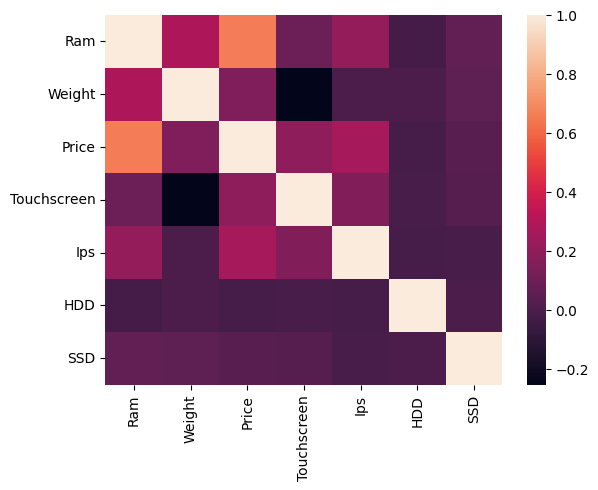

In [94]:
#  this visualization technique used to understand the correlation matrix
sns.heatmap(df[numerical_df1].corr())

<ipython-input-95-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

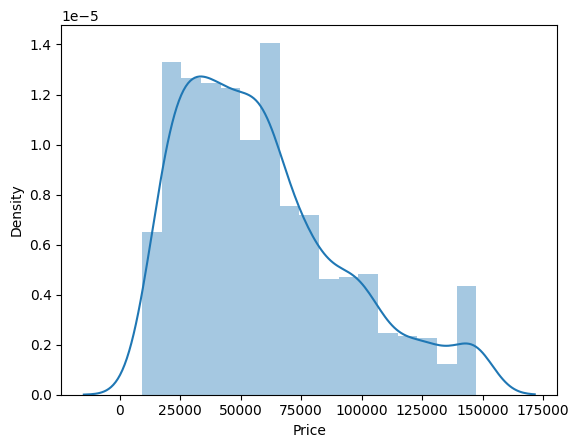

In [95]:
sns.distplot(df['Price'])

<ipython-input-97-cb9c235cb8ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

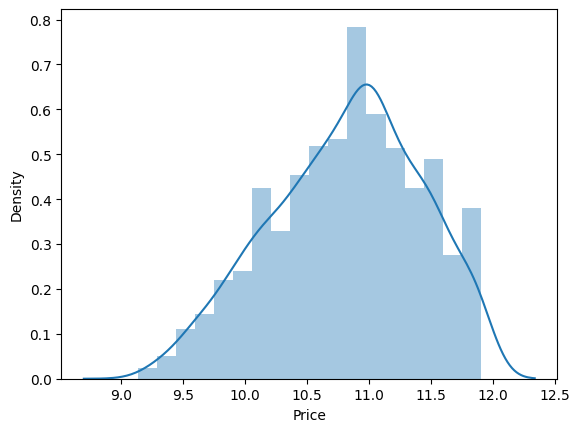

In [97]:
# use np.log---> for Transformation. its
sns.distplot(np.log(df['Price']))

### Model selection

In [98]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [99]:
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [100]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu_brand,Os,Gpu_brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,Mac,Intel,0,0
2,HP,Notebook,8,1.86,0,0,Intel Core i5,Others,Intel,0,256
3,Apple,Ultrabook,16,1.83,0,1,Intel Core i7,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,Mac,Intel,0,256
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,Intel Core i7,Windows,Intel,0,128
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,Intel Core i7,Windows,Intel,0,512
1300,Lenovo,Notebook,2,1.50,0,0,Other Intel Processor,Windows,Intel,0,0
1301,HP,Notebook,6,2.19,0,0,Intel Core i7,Windows,AMD,1000,0


In [101]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

In [103]:
pip install -U gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [104]:
import gradio as gr
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_error


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Model evalution

Linear Regression

In [110]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer( transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])
lr = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
lr.fit(X_train, y_train)
prd1 = lr.predict(X_test)
# Evaluate model performance
r2 = r2_score(y_test, prd1)
mae = mean_absolute_error(y_test, prd1)
mse = mean_squared_error(y_test, prd1)
print("r2:",r2)
print("mae:",mae)
print("mse:",mse)

r2: 0.7383620707483881
mae: 0.23435414533778695
mse: 0.09040393394602655


Decision Tree Regressor

In [111]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer( transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])
dtr = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor())])
dtr.fit(X_train, y_train)
prd1 = dtr.predict(X_test)
# Evaluate model performance
r2 = r2_score(y_test, prd1)
mae = mean_absolute_error(y_test, prd1)
mse = mean_squared_error(y_test, prd1)
print("r2:",r2)
print("mae:",mae)
print("mse:",mse)


r2: 0.7851802073109009
mae: 0.19799318912702407
mse: 0.07422683096489457


Random Forest Regressor

In [116]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer( transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])
rfr = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor())])
rfr.fit(X_train, y_train)
prd1 = rfr.predict(X_test)
# Evaluate model performance
r2 = r2_score(y_test, prd1)
mae = mean_absolute_error(y_test, prd1)
mse = mean_squared_error(y_test, prd1)
print("r2:",r2)
print("mae:",mae)
print("mse:",mse)

r2: 0.8702837513686686
mae: 0.15551979769351557
mse: 0.044820944755742026


### conclusion
Random Forest Regressor`s is given the best laptop price prediction of r2 value

r2: 0.8701242852621485

mae: 0.15740675200758572

mse: 0.04487604518938985

In [109]:
def predit_price(Company, TypeName, Ram, Inches,	Weight,	ScreenResolution, Cpu, Memory, Gpu, OpSys):
  input_data = pd.DataFrame({'Company': [Company], 'TypeName': [TypeName], 'Ram': [Ram], 'Inches': [Inches], 'Weight': [Weight], 'ScreenResolution': [ScreenResolution],
                             'Cpu': [Cpu], 'Memory': [Memory], 'Gpu': [Gpu], 'OpSys': [OpSys]})
  return pipeline.predict(input_data)[0]

iface=gr.Interface(fn = predit_price,
                   inputs=['text', 'text', 'number', 'number', 'number', 'number', 'text', 'number', 'number', 'number', 'text'],
                   outputs='text',
                   title='price prediction App'
)
iface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:924: UserWarning: Expected 10 arguments for function <function predit_price at 0x7ea0fb314430>, received 11.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:932: UserWarning: Expected maximum 10 arguments for function <function predit_price at 0x7ea0fb314430>, received 11.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9e43822ebbebba9bd4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
